In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from model import plotlib

plotlib.load_fonts("../../../common/fonts/")
plt.style.use("matplotlib.mplstyle")

In [3]:
plCSV = "../Data/classifier_pl_run1440/classifier_pl_run1440_results.csv"

plres = pd.read_csv(plCSV, index_col=0)
plres.head()

,score,model,xcols,val_wt_f1,val_acc,wt_f1,acc,S01,S02,S03,...,S09,S10,S11,S12,S13,S14,S15,S16,S17,S18
L413,2,"XGBClassifier(base_score=0.5, booster='gbtree'...",tsfw1 lsfw1 tspk2 tsfw2 tsfw3 lspk3 lsfw3 teos...,1.000000,1.000000,1.000000,1.000000,LoadData,ImputedData,SetYCol: coatingId,...,AugmentImb: ADASYN,SplitValidation: 0.20,NaN,ScaleX: StandardScaler,SetModel: DecisionTreeClassifier,SelectFeaturesRFE,SetModel: gbtree,RunCond: SearchHyperParams,TestPerformance,TestPerformance
L1300,1,"XGBClassifier(base_score=0.5, booster='gbtree'...",lspk2 lsfw2 tspk3 tsfw3 lspk3 lsfw3 teosVolume...,0.695538,0.675676,0.849206,0.833333,LoadData,ImputedData,SetYCol: coatingId,...,NaN,SplitValidation: 0.20,NaN,ScaleX: StandardScaler,SetModel: DecisionTreeClassifier,SelectFeaturesRFE,SetModel: gbtree,RunCond: SearchHyperParams,TestPerformance,TestPerformance
L1314,1,"XGBClassifier(base_score=0.5, booster='gbtree'...",tspk1 lsfw1 tsfw2 lspk2 lsfw2 tspk3 tsfw3 lspk...,0.705838,0.648649,0.849206,0.833333,LoadData,ImputedData,SetYCol: coatingId,...,NaN,SplitValidation: 0.20,AggregateFeatures,ScaleX: StandardScaler,SetModel: DecisionTreeClassifier,SelectFeaturesRFE,SetModel: gbtree,RunCond: SearchHyperParams,TestPerformance,TestPerformance
L01,0,"KNeighborsClassifier(leaf_size=1, n_jobs=-1, n...",tspk2 lsfw1 lspk2 tspk1 tsfw1 teosVolPct lsfw3,1.000000,1.000000,0.500000,0.500000,LoadData,ImputedData,SetYCol: coatingId,...,AugmentImb: ADASYN,SplitValidation: 0.20,NaN,ScaleX: StandardScaler,SetModel: DecisionTreeClassifier,SelectFeaturesRFE,SetModel: KNeighborsClassifier,RunCond: SearchHyperParams,TestPerformance,TestPerformance
L957,0,None,lsfw1 lspk1 lsfw2 tsfw1 tspk1 tsfw2 teosVolPct...,NaN,NaN,NaN,NaN,LoadData,ObservedData,SetYCol: coatingId,...,AugmentImb: ADASYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Save sorted by f1

In [4]:
plres = plres.sort_values('wt_f1', ascending=False)
plres.to_csv("f1_sorted.res.csv")

In [5]:
plres.loc['L01'].model

'KNeighborsClassifier(leaf_size=1, n_jobs=-1, n_neighbors=1, p=1)'

# most frequent features

In [611]:
l = []
for i in range(1400):
    l += plres.iloc[i+1, 2].split(' ')

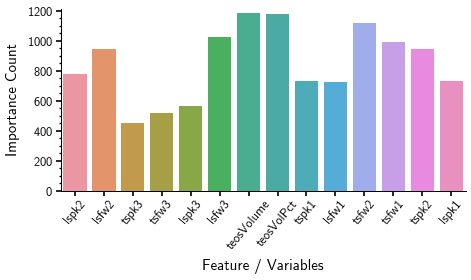

In [613]:
f, ax = plt.subplots(figsize=(4.1, 2.5))
sns.countplot(x=l, ax=ax)

ax.set(xlabel = "Feature / Variables", ylabel = "Importance Count")
plt.xticks(rotation=50)

plt.tight_layout()
plt.savefig("../Plots/x10_feature_frequency.png")
plt.show()

# Worst models

In [194]:
plres[plres.wt_f1 < 0.05].T

,L813,L482,L588,L161
score,0,0,0,0
model,"KNeighborsClassifier(leaf_size=1, n_jobs=-1, n...","XGBClassifier(base_score=0.5, booster='gbtree'...","KNeighborsClassifier(leaf_size=1, n_jobs=-1, n...","XGBClassifier(base_score=0.5, booster='gbtree'..."
xcols,lsfw2 tsfw3 lsfw3 teosVolume teosVolPct,tsfw3 lspk3 lsfw3 teosVolume teosVolPct,lspk2 lspk3 lsfw3 teosVolume teosVolPct,lspk1 tspk2 tspk3 tsfw3 lspk3 lsfw3 teosVolume...
val_wt_f1,0.125,0.304924,0.383072,0.665497
val_acc,0.083333,0.291667,0.291667,0.648649
wt_f1,0.047619,0.047619,0.047619,0.0
acc,0.166667,0.166667,0.166667,0.0
S01,LoadData,LoadData,LoadData,LoadData
S02,ImputedData,ImputedData,ImputedData,ImputedData
S03,SetYCol: coatingId,SetYCol: coatingId,SetYCol: coatingId,SetYCol: coatingId


# Best models

In [193]:
plres[plres.wt_f1 > 0.8].T

,L413,L1300,L1314
score,2,1,1
model,"XGBClassifier(base_score=0.5, booster='gbtree'...","XGBClassifier(base_score=0.5, booster='gbtree'...","XGBClassifier(base_score=0.5, booster='gbtree'..."
xcols,tsfw1 lsfw1 tspk2 tsfw2 tsfw3 lspk3 lsfw3 teos...,lspk2 lsfw2 tspk3 tsfw3 lspk3 lsfw3 teosVolume...,tspk1 lsfw1 tsfw2 lspk2 lsfw2 tspk3 tsfw3 lspk...
val_wt_f1,1.0,0.695538,0.705838
val_acc,1.0,0.675676,0.648649
wt_f1,1.0,0.849206,0.849206
acc,1.0,0.833333,0.833333
S01,LoadData,LoadData,LoadData
S02,ImputedData,ImputedData,ImputedData
S03,SetYCol: coatingId,SetYCol: coatingId,SetYCol: coatingId


# Features of the best models

In [208]:
np.unique(" ".join([x for x in plres[plres.wt_f1 > 0.8].xcols]).split(' '))

array(['lsfw1', 'lsfw2', 'lsfw3', 'lspk2', 'lspk3', 'teosVolPct',
       'teosVolume', 'tsfw1', 'tsfw2', 'tsfw3', 'tspk1', 'tspk2', 'tspk3'],
      dtype='<U10')

# Unique values of each columns

In [250]:
plres[plres.columns[plres.columns.str.startswith("S")]].apply(pd.unique)

S01                                           [LoadData]
S02                          [ImputedData, ObservedData]
S03                                 [SetYCol: coatingId]
S04                                       [Set: scoring]
S05                                   [DropCol: coating]
S06             [AllValidFeatures, NonCollinearFeatures]
S07    [AugmentByQuality: F=1 scale=0.30, nan, Augmen...
S08                        [ScaleX: StandardScaler, nan]
S09    [AugmentImb: ADASYN, nan, AugmentImb: SMOTE, A...
S10                         [SplitValidation: 0.20, nan]
S11                             [nan, AggregateFeatures]
S12                        [ScaleX: StandardScaler, nan]
S13              [SetModel: DecisionTreeClassifier, nan]
S14                             [SelectFeaturesRFE, nan]
S15    [SetModel: gbtree, SetModel: GaussianProcessCl...
S16                    [RunCond: SearchHyperParams, nan]
S17                               [TestPerformance, nan]
S18                            

# Grouped Boxplots

In [420]:
plres[plres.columns[plres.columns.str.startswith("S")]].apply(pd.unique)

S01                                           [LoadData]
S02                          [ImputedData, ObservedData]
S03                                 [SetYCol: coatingId]
S04                                       [Set: scoring]
S05                                   [DropCol: coating]
S06             [AllValidFeatures, NonCollinearFeatures]
S07    [AugmentByQuality: F=1 scale=0.30, nan, Augmen...
S08                        [ScaleX: StandardScaler, nan]
S09    [AugmentImb: ADASYN, nan, AugmentImb: SMOTE, A...
S10                         [SplitValidation: 0.20, nan]
S11                             [nan, AggregateFeatures]
S12                        [ScaleX: StandardScaler, nan]
S13              [SetModel: DecisionTreeClassifier, nan]
S14                             [SelectFeaturesRFE, nan]
S15    [SetModel: gbtree, SetModel: GaussianProcessCl...
S16                    [RunCond: SearchHyperParams, nan]
S17                               [TestPerformance, nan]
S18                            

In [6]:
df = plres[~plres.wt_f1.isna()].copy()
df['augmentation'] = df.S09.str.replace("AugmentImb: ", '')
df.loc[~df.S07.isna() & df.S09.isna(), 'augmentation'] = 'Quality'
df.loc[df['augmentation'].isna(), 'augmentation'] = 'No augmentation'
df.loc[:, 'S15'] = df.S15.str.replace('SetModel: ', '')
df = df[df.S15 != 'XGBClassifier']
df = df[['S02', 'augmentation', 'S15', 'wt_f1']]
df

,S02,augmentation,S15,wt_f1
L413,ImputedData,ADASYN,gbtree,1.000000
L1314,ImputedData,Quality,gbtree,0.849206
L1300,ImputedData,Quality,gbtree,0.849206
L669,ImputedData,ADASYN,KNeighborsClassifier,0.777778
L783,ImputedData,RandomOverSampler,KNeighborsClassifier,0.777778
...,...,...,...,...
L814,ImputedData,No augmentation,KNeighborsClassifier,0.083333
L813,ImputedData,No augmentation,KNeighborsClassifier,0.047619
L482,ImputedData,No augmentation,gbtree,0.047619
L588,ImputedData,No augmentation,KNeighborsClassifier,0.047619


In [16]:
df.S15.unique()

array(['gbtree', 'KNeighborsClassifier', 'GaussianProcessClassifier',
       'SVC'], dtype=object)

In [17]:
alg = 'GaussianProcessClassifier'
alg = 'SVC'
data = 'ImputedData'
# data = 'ObservedData'
df[(df.S15 == alg) & (df.S02 == data)]

,S02,augmentation,S15,wt_f1
L805,ImputedData,SMOTE,SVC,0.777778
L529,ImputedData,No augmentation,SVC,0.666667
L416,ImputedData,SMOTE,SVC,0.654762
L1141,ImputedData,SMOTE,SVC,0.654762
L430,ImputedData,SMOTE,SVC,0.654762
...,...,...,...,...
L746,ImputedData,No augmentation,SVC,0.222222
L1256,ImputedData,No augmentation,SVC,0.222222
L801,ImputedData,SMOTE,SVC,0.222222
L287,ImputedData,ADASYN,SVC,0.222222


In [608]:
# Boxplot properties
d = {
"boxplot.notch":       False,
"boxplot.vertical":    True,
"boxplot.whiskers":    1.5,
"boxplot.bootstrap":   100,
"boxplot.patchartist": False,
"boxplot.showmeans":   False,
"boxplot.showcaps":    True,
"boxplot.showbox":     True,
"boxplot.showfliers":  True,
"boxplot.meanline":    False,

"boxplot.flierprops.color":           "k",
"boxplot.flierprops.marker":          "x",
"boxplot.flierprops.markerfacecolor": "#0ee",
"boxplot.flierprops.markeredgecolor": "k",
"boxplot.flierprops.markeredgewidth": 0.5,
"boxplot.flierprops.markersize":      6,
"boxplot.flierprops.linestyle":       "none",
"boxplot.flierprops.linewidth":       0.6,

"boxplot.boxprops.color":     "#333",
"boxplot.boxprops.linewidth": 0.6,
"boxplot.boxprops.linestyle": "-",

"boxplot.whiskerprops.color":     "k",
"boxplot.whiskerprops.linewidth": 1.0,
"boxplot.whiskerprops.linestyle": "-",

"boxplot.capprops.color":     "k",
"boxplot.capprops.linewidth": 1.0,
"boxplot.capprops.linestyle": "-",

"boxplot.medianprops.color":     "k",
"boxplot.medianprops.linewidth": 1.0,
"boxplot.medianprops.linestyle": "none",

"boxplot.meanprops.color":           "b",
"boxplot.meanprops.marker":          "^",
"boxplot.meanprops.markerfacecolor": "b",
"boxplot.meanprops.markeredgecolor": "b",
"boxplot.meanprops.markersize":       6,
"boxplot.meanprops.linestyle":       "--",
"boxplot.meanprops.linewidth":       1.,
}

## Plot

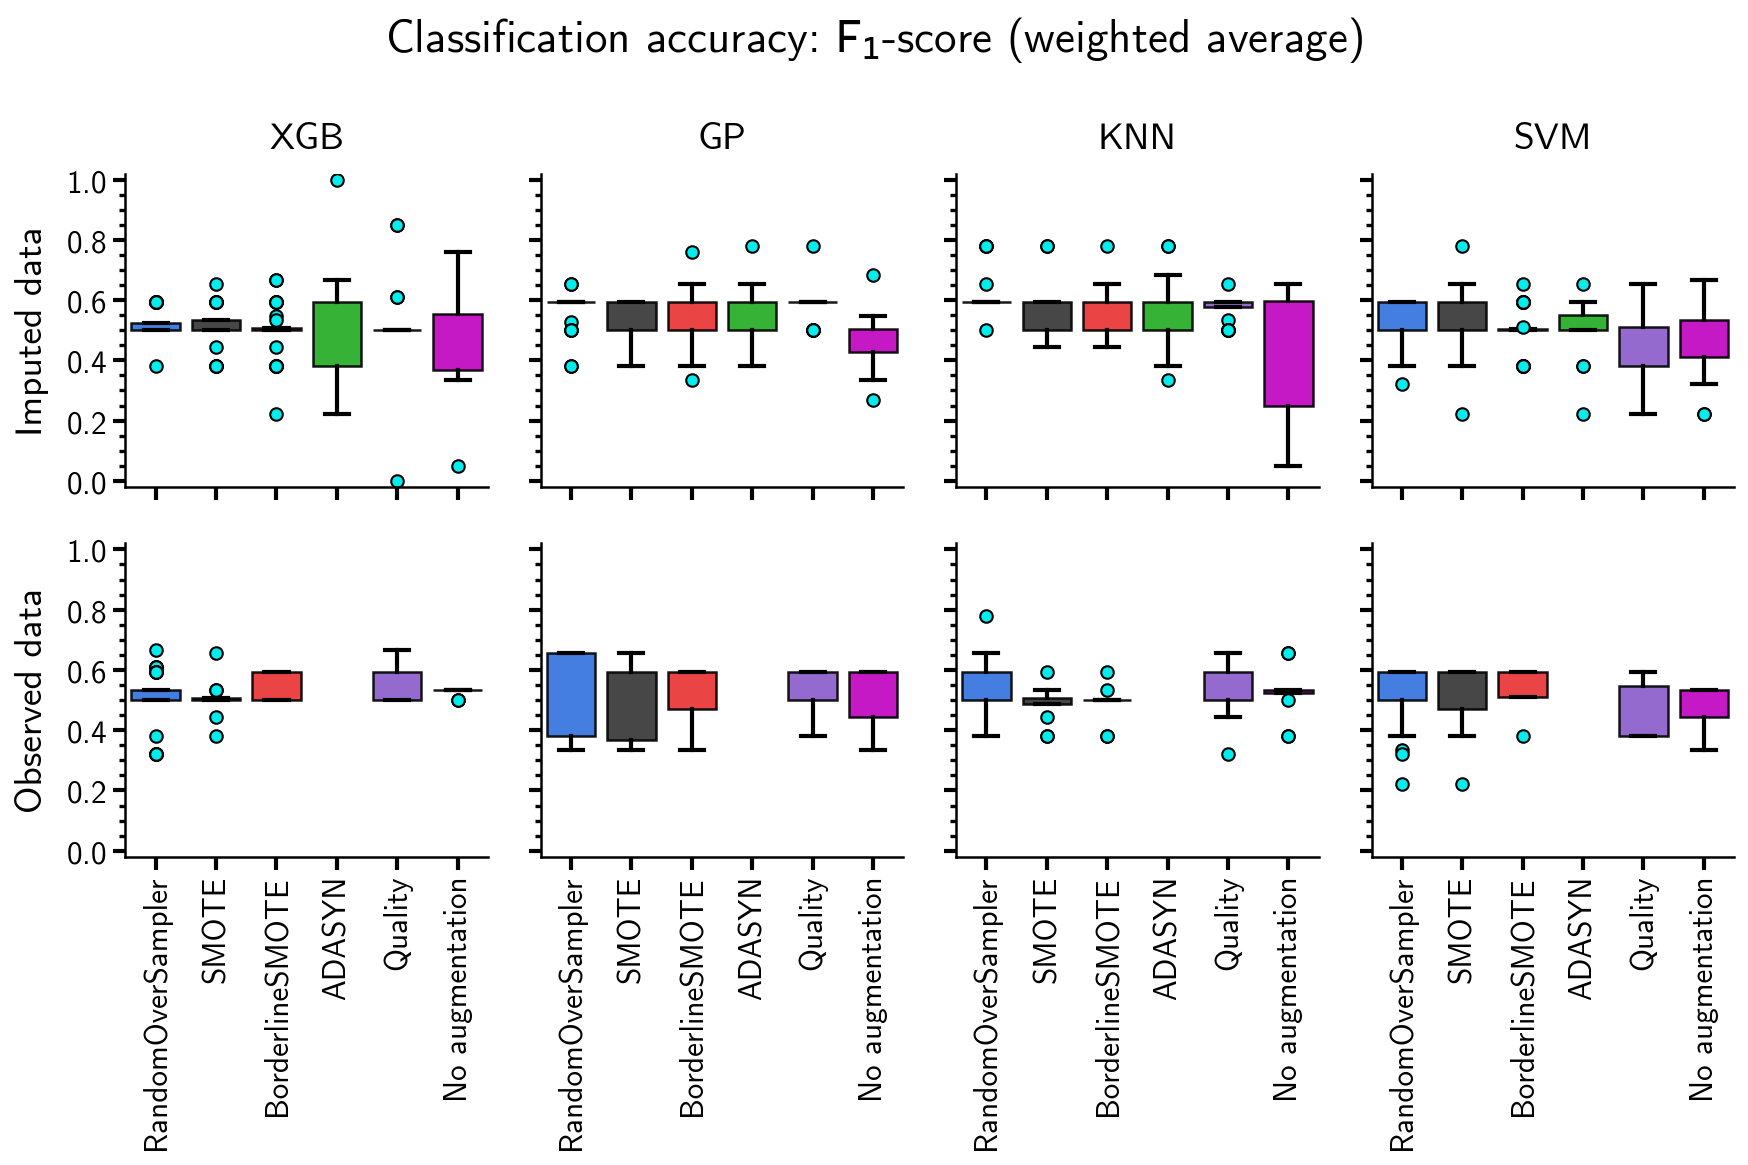

In [609]:
plt.rcParams['xtick.minor.visible'] = False
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams.update(d)

fig, axes = plt.subplots(2, 4, dpi=300, figsize=(6, 4), sharey=True, sharex=False)

lbls = ['RandomOverSampler', 'SMOTE', 'BorderlineSMOTE', 'ADASYN', 'Quality', 'No augmentation']
colors = ["#3070dd", "#333", "#e93030", "#20aa20", "#8a5aca", "m", "#e4a635"]


for i, imp in enumerate(df.S02.unique()): # imputed or observed in the rows
    df1 = df[df.S02 == imp]
    
    for j, alg in enumerate(df.S15.unique()): # algorithm in the columns
        ax = axes[i, j]
        df2 = df1[df1.S15 == alg]
        vals = [ df2.loc[df2.augmentation == a].wt_f1 for a in lbls ]
        box = ax.boxplot(vals, sym='.', widths=0.8, patch_artist=True)
        
        # count = 0
        # for n, v in enumerate(vals):
        #     count = v[v > 0.8].shape[0]
        #     if count == 0: continue
        #     ax.annotate("%d" %count, (n+0.8, 1.1), fontsize='small', font='serif')
            
        for patch, color in zip(box['boxes'], colors):
            patch.set_facecolor(color)
            patch.set_edgecolor('k')
            patch.set_alpha(0.9)

        ax.set(xlabel='')
        # ax.grid()
        
        if i == 0:
            ax.set(xticklabels=[], yticks=np.arange(0, 1.001, 0.20))
        else:
            ax.set_xticklabels(lbls, rotation=90)        
            ax.set(title = '')

axes[0, 0].set(ylabel = "Imputed data")
axes[1, 0].set(ylabel = "Observed data")

alg = ['XGB', 'GP', 'KNN', 'SVM']
for j in range(4): axes[0, j].set(title = alg[j])

# plt.ylim(0.0, 1.15)
# plt.xlim(0, 7)
plt.suptitle('Classification accuracy: $F_1$-score (weighted average)', fontfamily='cursive')
plt.tight_layout()
plt.savefig("../Plots/x10_classifier_grouped_boxplots.png")
plt.show()